In [2]:
import pandas as pd
from pandas import Series, DataFrame
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
losAngeles = pd.read_csv('data.csv', low_memory = False)

### Rough overview of data for the first time

In [3]:
losAngeles.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [4]:
losAngeles.shape

(285008, 35)

### Overview of Los Angeles City Payroll Columns

In [5]:
losAngeles.columns

Index(['Row ID', 'Year', 'Department Title', 'Payroll Department',
       'Record Number', 'Job Class Title', 'Employment Type',
       'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
       '% Over Base Pay', 'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'MOU', 'MOU Title', 'FMS Department',
       'Job Class', 'Pay Grade', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost', 'Benefits Plan',
       'Job Class Link'],
      dtype='object')

### Unique cells checked in Row ID to determine column's suitability for DataFrame ID.

In [3]:
losAngeles['Row ID'].nunique()

285008

### Take a look at size of the file to determine which fields can be turned into 'category' in order to reference a small list of values

In [7]:
losAngeles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
Row ID                          285008 non-null int64
Year                            285008 non-null int64
Department Title                285008 non-null object
Payroll Department              231463 non-null float64
Record Number                   285008 non-null object
Job Class Title                 285008 non-null object
Employment Type                 285008 non-null object
Hourly or Event Rate            263987 non-null object
Projected Annual Salary         285008 non-null object
Q1 Payments                     285008 non-null object
Q2 Payments                     285008 non-null object
Q3 Payments                     285008 non-null object
Q4 Payments                     285008 non-null object
Payments Over Base Pay          285008 non-null object
% Over Base Pay                 285008 non-null object
Total Payments                  285008 non-null object
Base Pay  

### See which columns are related to pay and what values look like

In [8]:
losAngeles[['Payroll Department', 'Hourly or Event Rate', 'Lump Sum Pay', 'Overtime Pay', 'MOU', 'MOU Title', 'Pay Grade', 
          'Benefits Plan']].head()

,Payroll Department,Hourly or Event Rate,Lump Sum Pay,Overtime Pay,MOU,MOU Title,Pay Grade,Benefits Plan
0,NaN,NaN,NaN,$369.12,NaN,NaN,NaN,DWP
1,4301.0,$25.12,$0.00,$11.13,24,POLICE OFFICERS UNIT,A,Police
2,4301.0,$42.77,$0.00,$482.29,24,POLICE OFFICERS UNIT,2,Police
3,3201.0,$28.75,$0.00,$11504.72,12,SUPV BLUE COLLAR,0,City
4,7024.0,$30.92,$0.00,$417.37,03,CLERICAL UNIT,0,City


### Replace NaN values to allow me to process digits as ints or floats

In [4]:
losAngeles['Payroll Department'].fillna(0, inplace = True)
losAngeles['Hourly or Event Rate'].fillna(0, inplace = True)
losAngeles['Lump Sum Pay'].fillna(0, inplace = True)
losAngeles['Overtime Pay'].fillna(0, inplace = True)
losAngeles['MOU'].fillna(0, inplace = True)

In [11]:
losAngeles['Job Class Title'].nunique()

1638

In [5]:
losAngeles['MOU Title'].fillna('Missing', inplace = True)
losAngeles['Pay Grade'].fillna('Missing', inplace = True)
losAngeles['Benefits Plan'].fillna('Missing', inplace = True)

### Use 'category' wherever it makes sense to make file smaller and take up less memory

In [5]:
losAngeles['Employment Type'] = losAngeles['Employment Type'].astype('category')
losAngeles['Department Title'] = losAngeles['Department Title'].astype('category')
losAngeles['FMS Department'] = losAngeles['FMS Department'].astype('category')
losAngeles['Pay Grade'] = losAngeles['Pay Grade'].astype('category')
losAngeles['Job Class'] = losAngeles['Job Class'].astype('category')
losAngeles['MOU Title'] = losAngeles['MOU Title'].astype('category')
losAngeles['Benefits Plan'] = losAngeles['Benefits Plan'].astype('category')
losAngeles['Payroll Department'] = losAngeles['Payroll Department'].astype('category')
losAngeles['Job Class Title'] = losAngeles['Job Class Title'].astype('category')


In [6]:
losAngeles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
Row ID                          285008 non-null int64
Year                            285008 non-null int64
Department Title                285008 non-null category
Payroll Department              285008 non-null category
Record Number                   285008 non-null object
Job Class Title                 285008 non-null category
Employment Type                 285008 non-null category
Hourly or Event Rate            285008 non-null object
Projected Annual Salary         285008 non-null object
Q1 Payments                     285008 non-null object
Q2 Payments                     285008 non-null object
Q3 Payments                     285008 non-null object
Q4 Payments                     285008 non-null object
Payments Over Base Pay          285008 non-null object
% Over Base Pay                 285008 non-null object
Total Payments                  285008 non-null object
Bas

### Set DataFrame 'Row ID' as index as it is unique

In [7]:
losAngeles.set_index(['Row ID'], inplace = True)

In [15]:
losAngeles.head()

,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
Row ID,,,,,,,,,,,,,,,,,,,,,
111391,2014,Water And Power (DWP),0.0,1412316577,Commercial Service Representative,Full Time,0,$70386.48,$16129.89,$17829.78,...,Missing,98,1230,Missing,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


### Use 'replace' to take off $ from float values

In [8]:
losAngeles['Hourly or Event Rate'] = losAngeles['Hourly or Event Rate'].str.replace('$', '')
losAngeles['Q1 Payments'] = losAngeles['Q1 Payments'].str.replace('$', '')
losAngeles['Q2 Payments'] = losAngeles['Q2 Payments'].str.replace('$', '')
losAngeles['Q3 Payments'] = losAngeles['Q3 Payments'].str.replace('$', '')
losAngeles['Q4 Payments'] = losAngeles['Q4 Payments'].str.replace('$', '')
losAngeles['Projected Annual Salary'] = losAngeles['Projected Annual Salary'].str.replace('$', '')
losAngeles['Total Payments'] = losAngeles['Total Payments'].str.replace('$', '')
losAngeles['Base Pay'] = losAngeles['Base Pay'].str.replace('$', '')
losAngeles['Overtime Pay'] = losAngeles['Overtime Pay'].str.replace('$', '')
losAngeles['Other Pay (Payroll Explorer)'] = losAngeles['Other Pay (Payroll Explorer)'].str.replace('$', '')

### Format them as 'float'

In [9]:
losAngeles['Q1 Payments'] = losAngeles['Q1 Payments'].astype(float)
losAngeles['Q2 Payments'] = losAngeles['Q2 Payments'].astype(float)
losAngeles['Q3 Payments'] = losAngeles['Q3 Payments'].astype(float)
losAngeles['Q4 Payments'] = losAngeles['Q4 Payments'].astype(float)
losAngeles['Projected Annual Salary'] = losAngeles['Projected Annual Salary'].astype(float)
losAngeles['Total Payments'] = losAngeles['Total Payments'].astype(float)
losAngeles['Base Pay'] = losAngeles['Base Pay'].astype(float)
losAngeles['Overtime Pay'] = losAngeles['Overtime Pay'].astype(float)
losAngeles['Other Pay (Payroll Explorer)'] = losAngeles['Other Pay (Payroll Explorer)'].astype(float)

In [20]:
losAngeles[['Total Payments', 'Base Pay', 'Overtime Pay','Other Pay (Payroll Explorer)']].head()

,Total Payments,Base Pay,Overtime Pay,Other Pay (Payroll Explorer)
0,74584.48,60310.57,369.12,13904.79
1,51207.45,49507.05,11.13,1689.27
2,89029.61,84909.41,482.29,3637.91
3,71936.24,57660.80,11504.72,2770.72
4,64583.37,59391.75,417.37,4774.25


In [10]:
losAngeles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285008 entries, 111391 to 285208
Data columns (total 34 columns):
Year                            285008 non-null int64
Department Title                285008 non-null category
Payroll Department              285008 non-null category
Record Number                   285008 non-null object
Job Class Title                 285008 non-null category
Employment Type                 285008 non-null category
Hourly or Event Rate            263987 non-null object
Projected Annual Salary         285008 non-null float64
Q1 Payments                     285008 non-null float64
Q2 Payments                     285008 non-null float64
Q3 Payments                     285008 non-null float64
Q4 Payments                     285008 non-null float64
Payments Over Base Pay          285008 non-null object
% Over Base Pay                 285008 non-null object
Total Payments                  285008 non-null float64
Base Pay                        285008 non-nul

### A one-liner function (could have used lambda) to create bins. They will be used for 'count' to see how salaries are distributed within the City

In [134]:
def custom_round(Salary):
    return int(Salary/10000.0) * 10000


### Filter out 2016 and a particular salary field

In [135]:
current_year = losAngeles['Year'] == 2016 

In [136]:
adjusted_to_2016 = losAngeles[current_year]

In [152]:
salary_binned = adjusted_to_2016['Projected Annual Salary'].apply(custom_round).value_counts()

In [154]:
salary_binned.nunique()

32

In [159]:
plt.style.available

['seaborn-dark-palette',
 'ggplot',
 'seaborn-notebook',
 'seaborn-ticks',
 'classic',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-muted',
 'seaborn-darkgrid',
 'seaborn-bright',
 'seaborn-paper',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'bmh',
 'seaborn-colorblind',
 'seaborn-pastel',
 'grayscale']

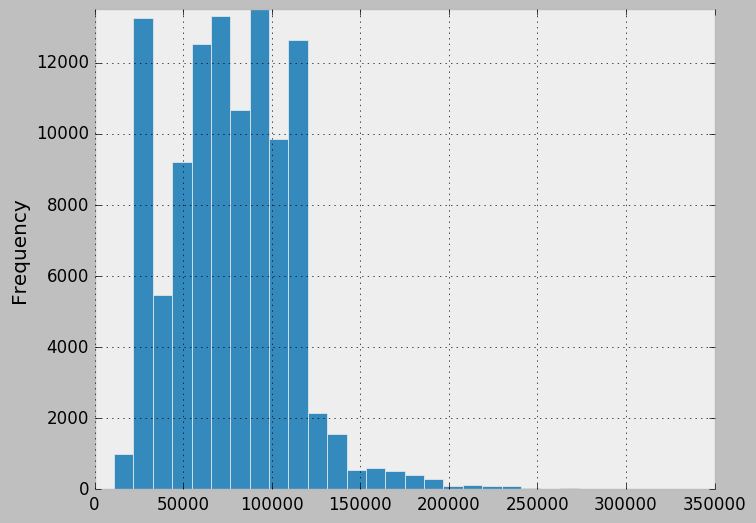

In [160]:
plt.style.use('bmh')
adjusted_to_2016['Projected Annual Salary'].apply(custom_round).plot(kind = 'hist', bins = 32, xlim = (0,350000), ylim = (0,13500))


In [ ]:
Grouped_losAngeles = losAngeles.groupby('Year')

In [26]:
Grouped_losAngeles.mean()

,Row ID,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Total Payments,Base Pay,Overtime Pay,Other Pay (Payroll Explorer)
Year,,,,,,,,,,
2013,28690,77971.779611,18277.415059,20837.811452,18238.202419,21174.371716,78527.800646,66091.011308,6539.704504,5856.143429
2014,85853,80294.285833,19190.455110,21949.839469,19979.965512,21864.603100,82984.863190,67658.818894,8298.317302,7043.140405
2015,144211,79089.182377,19830.518866,20938.553707,22154.771877,18780.911203,81704.755653,66342.307776,9277.312312,6103.321029
2016,229653,81360.457037,24402.429211,10261.882374,0.000000,0.000000,34664.311585,28016.720584,3777.282942,2870.308060


In [27]:
Grouped_losAngeles.var()

,Row ID,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Total Payments,Base Pay,Overtime Pay,Other Pay (Payroll Explorer)
Year,,,,,,,,,,
2013,274367251,1.085438e+09,1.429782e+08,1.805406e+08,1.335245e+08,1.960531e+08,2.347080e+09,1.489489e+09,2.292856e+08,8.479856e+07
2014,270260970,1.110051e+09,1.585329e+08,2.067112e+08,1.664058e+08,2.082760e+08,2.653188e+09,1.553384e+09,2.949110e+08,1.045318e+08
2015,297679504,1.171695e+09,2.121269e+08,2.155586e+08,2.384508e+08,1.720642e+08,2.999430e+09,1.691381e+09,3.757067e+08,1.073698e+08
2016,1030721546,1.110319e+09,2.256984e+08,1.817776e+08,0.000000e+00,0.000000e+00,5.720759e+08,3.145872e+08,6.772076e+07,3.226601e+07


In [28]:
Grouped_losAngeles.describe()

Base Pay  Other Pay (Payroll Explorer)   Overtime Pay  \
Year                                                                     
2013 count   57379.000000                  57379.000000   57257.000000   
     mean    66091.011308                   5856.143429    6539.704504   
     std     38593.900416                   9208.613409   15142.179855   
     min      -878.700000                  -6439.260000   -1019.490000   
     25%     40793.475000                    650.000000       0.000000   
     50%     71802.300000                   3316.160000       0.000000   
     75%     92055.385000                   7156.425000    5100.490000   
     max    353346.480000                 435621.770000  242033.210000   
2014 count   56948.000000                  56948.000000   56794.000000   
     mean    67658.818894                   7043.140405    8298.317302   
     std     39412.999013                  10224.079448   17172.972736   
     min     -3838.380000                 -30878.270000    -670.820000   
     25%     41366.305000                   1007.315000       0.000000   
     50%     72008.940000                   4702.635000     770.115000   
     75%     93998.000000                   8592.710000    8636.715000   
     max    359361.600000                 265176.140000  286535.970000   
2015 count   59767.000000                  59767.000000   59609.000000   
     mean    66342.307776                   6103.321029    9277.312312   
     std     41126.407343                  10361.941038   19383.155070   
     min     -1397.760000                  -8335.140000    -596.130000   
     25%     28230.900000                    429.690000       0.000000   
     50%     72704.000000                   2919.910000     681.620000   
     75%     94078.400000                   7587.105000    9736.010000   
     max    348670.400000                 294852.110000  311315.620000   
2016 count  110914.000000                 110914.000000  110914.000000   
     mean    28016.720584                   2870.308060    3777.282942   
     std     17736.606973                   5680.317654    8229.262651   
     min     -1584.960000                  -2271.290000    -543.790000   
     25%     16101.637500                    200.000000       0.000000   
     50%     25984.000000                   1320.800000     255.685000   
     75%     40402.940000                   3487.470000    3805.782500   
     max    174335.200000                 179569.160000  199497.070000   

            Projected Annual Salary    Q1 Payments    Q2 Payments  \
Year                                                                
2013 count             57379.000000   57379.000000   57379.000000   
     mean              77971.779611   18277.415059   20837.811452   
     std               32945.988602   11957.350329   13436.540955   
     min                   0.000000   -2254.580000   -4060.150000   
     25%               54879.950000   11251.580000   13078.870000   
     50%               77443.920000   19162.220000   21918.400000   
     75%               97997.150000   25053.410000   28603.120000   
     max              360743.760000  239000.430000  177738.160000   
2014 count             56948.000000   56948.000000   56948.000000   
     mean              80294.285833   19190.455110   21949.839469   
     std               33317.426909   12590.983198   14377.454813   
     min                   0.000000   -1026.480000  -12607.850000   
     25%               57795.840000   11888.600000   13754.452500   
     50%               79161.300000   20103.380000   23144.800000   
     75%               99671.137500   26500.800000   29932.097500   
     max              360743.760000  173062.060000  191435.350000   
2015 count             59767.000000   59767.000000   59767.000000   
     mean              79089.182377   19830.518866   20938.553707   
     std               34230.028554   14564.577641   14681.913338   
     min                   0.000000       0.000000 